In [1]:
# imports
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
def parse_file(file_name: str) -> dict[str, list[dict[str, str]]]:
    """
    Parses a file containing metrics and returns a dictionary of strategies with their corresponding metrics.

    Args:
      file_name (str): The name of the file to parse.

    Returns:
      dict[str, list[dict[str, str]]]: A dictionary where the keys are strategy names and the values are lists of metrics.
    """
    strats = {}
    cur_strat = ""
    entries = 0

    with open(file_name, "r") as file:
        for line in file.readlines():
            if line.startswith("["):
                cur_strat = line.strip().strip("[]").lower()
                strats[cur_strat] = []
                entries = 0

            else:
                if entries >= 100000:
                    continue
                metric = line_to_dict(line)
                strats[cur_strat].append(metric)
                entries += 1

    return strats


def line_to_dict(line):
    """
    Converts a line of comma-separated key-value pairs into a dictionary.

    Args:
      line (str): The line containing comma-separated key-value pairs.

    Returns:
      dict: A dictionary where the keys are the lowercase keys from the line and the values are the corresponding values.
    """
    metric = {}
    for kv in line.split(", "):
        k, v = kv.split(": ")
        metric[k.lower()] = v
    return metric

In [3]:
def load_data(file_name):
    """
    Load data from a file or parse the file if it doesn't exist.

    Args:
      file_name (str): The name of the file to load or parse.

    Returns:
      data: The loaded or parsed data.
    """
    try:
        with open(file_name + ".pkl", "rb") as file:
            data = pickle.load(file)
    except:
        data = parse_file(file_name)
        with open(file_name + ".pkl", "wb") as file:
            pickle.dump(data, file)
    return data

In [4]:
# load data
file_name = "millionGames.txt"
strats = load_data(file_name)

# print sample data
print("Loaded data from", file_name)
print("Strategies:", [strat for strat in strats])
print("Records per strategy:", [len(strats[strat]) for strat in strats])

# sample records
for strat in strats:
    print(f"\n{strat}: {len(strats[strat])} records")
    for metric in strats[strat][:3]:
        print(metric)

Loaded data from millionGames.txt
Strategies: ['bincode', 'huffman', 'dynamic huffman', 'opening huffman']
Records per strategy: [100000, 100000, 100000, 100000]

bincode: 100000 records
{'time to compress (seconds)': '0.001128072', 'time to decompress (seconds)': '0.000041585', 'compressed size (bits)': '2248', 'decompressed size (bits)': '4000', 'bits per move': '38.101694915254235', 'bits per move excluding headers': '28.88135593220339\n'}
{'time to compress (seconds)': '0.000284501', 'time to decompress (seconds)': '0.000029957', 'compressed size (bits)': '1568', 'decompressed size (bits)': '2632', 'bits per move': '43.55555555555556', 'bits per move excluding headers': '31.77777777777778\n'}
{'time to compress (seconds)': '0.000412651', 'time to decompress (seconds)': '0.000053737', 'compressed size (bits)': '2912', 'decompressed size (bits)': '5688', 'bits per move': '30.652631578947368', 'bits per move excluding headers': '25.68421052631579\n'}

huffman: 100000 records
{'time to

In [5]:
IGNORE_BINCODE = False

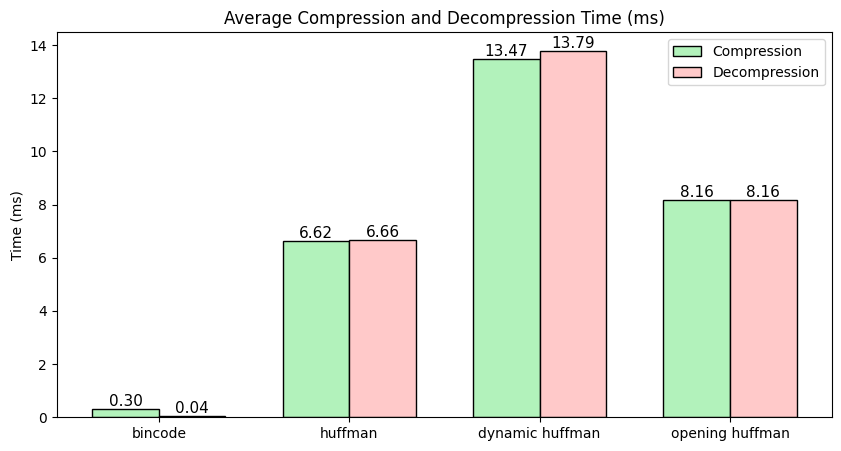

In [6]:
def plot_time_bar():
    times = {}
    for key in strats:
        if IGNORE_BINCODE and key == "bincode":
            continue

        compress_times = [
            float(metric["time to compress (seconds)"]) for metric in strats[key]
        ]
        decompress_times = [
            float(metric["time to decompress (seconds)"]) for metric in strats[key]
        ]
        times[key] = (compress_times, decompress_times)

    # plot the compression and decompression times next to each other
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(times))
    width = 0.35
    bars1 = ax.bar(
        x - width / 2,
        [np.mean(times[key][0]) * 1000 for key in times],
        width,
        label="Compression",
        color="#b2f2bb",
        edgecolor="black",
    )
    bars2 = ax.bar(
        x + width / 2,
        [np.mean(times[key][1]) * 1000 for key in times],
        width,
        label="Decompression",
        color="#ffc9c9",
        edgecolor="black",
    )

    # Add labels on top of the bars
    for bars in [bars1, bars2]:
        for bar in bars:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{bar.get_height():.2f}",
                ha="center",
                va="bottom",
                fontsize=11,
            )

    ax.set_ylabel("Time (ms)")
    ax.set_title("Average Compression and Decompression Time (ms)")
    ax.set_xticks(x)
    ax.set_xticklabels(times.keys())
    ax.legend()

    plt.show()


plot_time_bar()

Average compress times:
bincode 0.00030104844791999997
huffman 0.006624395112390001
dynamic huffman 0.013468501592120001
opening huffman 0.00816015239604

Average decompress times:
bincode 4.356303395e-05
huffman 0.0066551153703
dynamic huffman 0.013791664104669999
opening huffman 0.008161043311810001


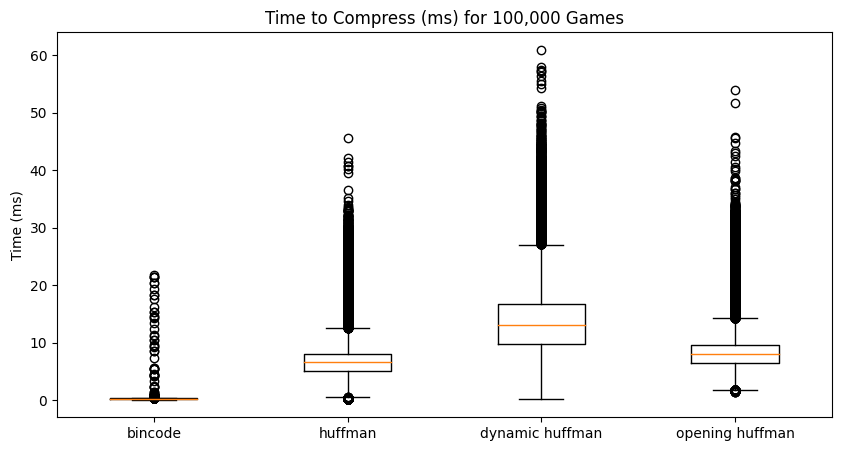

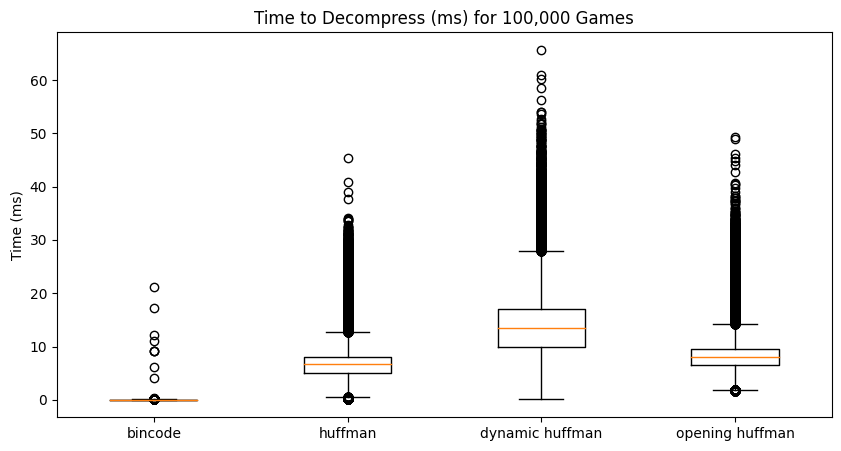

In [7]:
def plot_time_box():
    times = {}
    for key in strats:
        if IGNORE_BINCODE and key == "bincode":
            continue

        compress_times = [
            float(metric["time to compress (seconds)"]) for metric in strats[key]
        ]
        decompress_times = [
            float(metric["time to decompress (seconds)"]) for metric in strats[key]
        ]
        times[key] = (compress_times, decompress_times)

    # print the average compress and decompress times
    print("Average compress times:")
    for key in times:
        print(key, np.mean(times[key][0]))
    print("\nAverage decompress times:")
    for key in times:
        print(key, np.mean(times[key][1]))

    # plot compress and decompress times on separate box charts
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.boxplot(np.multiply([times[key][0] for key in times], 1000).T)
    ax.set_xticklabels(times.keys())
    plt.title("Time to Compress (ms) for 100,000 Games")
    ax.set_ylabel("Time (ms)")
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.boxplot(np.multiply([times[key][1] for key in times], 1000).T)
    ax.set_xticklabels(times.keys())
    plt.title("Time to Decompress (ms) for 100,000 Games")
    ax.set_ylabel("Time (ms)")
    plt.show()


plot_time_box()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


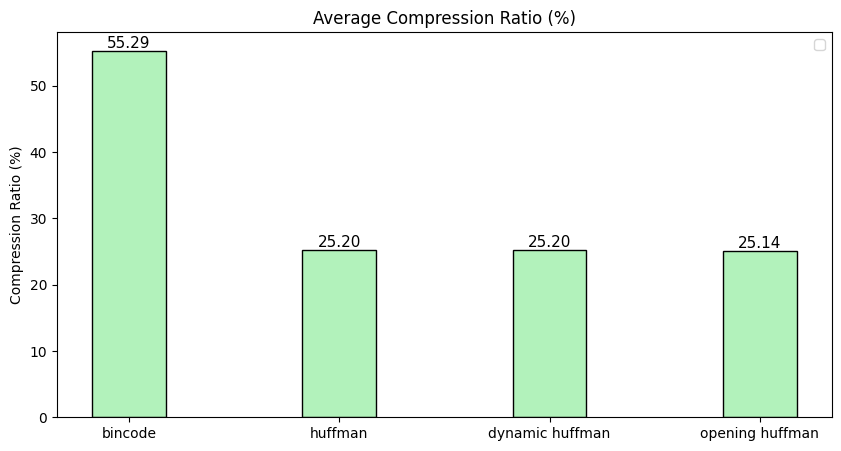

In [8]:
def plot_compression_ratio_bar():
    ratios = {}
    for key in strats:
        if IGNORE_BINCODE and key == "bincode":
            continue

        compress_ratios = [
            float(metric["compressed size (bits)"])
            / float(metric["decompressed size (bits)"])
            for metric in strats[key]
        ]
        ratios[key] = compress_ratios

    # plot the compression and decompression times next to each other
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(ratios))
    width = 0.35
    bars1 = ax.bar(
        x,
        [np.mean(ratios[key]) * 100 for key in ratios],
        width,
        label="",
        color="#b2f2bb",
        edgecolor="black",
    )

    ax.set_ylabel("Compression Ratio (%)")
    ax.set_title("Average Compression Ratio (%)")
    ax.set_xticks(x)
    ax.set_xticklabels(ratios.keys())
    ax.legend()

    # Add labels on top of the bars
    for bars in [bars1]:
        for bar in bars:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{bar.get_height():.2f}",
                ha="center",
                va="bottom",
                fontsize=11,
            )

    plt.show()


IGNORE_BINCODE = False
plot_compression_ratio_bar()

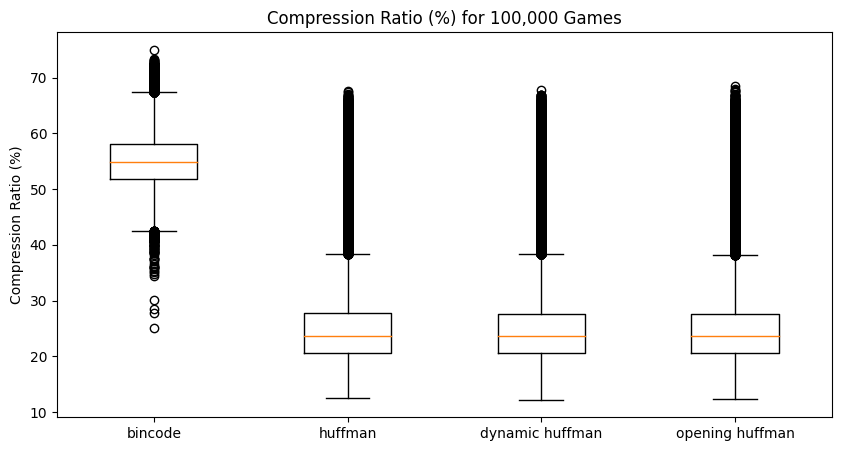

In [9]:
def plot_compression_efficiency_box():
    ratios = {}
    for key in strats:
        if IGNORE_BINCODE and key == "bincode":
            continue

        compress_ratios = [
            float(metric["compressed size (bits)"])
            / float(metric["decompressed size (bits)"])
            for metric in strats[key]
        ]
        ratios[key] = compress_ratios

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.boxplot(np.multiply([ratios[key] for key in ratios], 100).T)
    ax.set_xticklabels(ratios.keys())
    plt.title("Compression Ratio (%) for 100,000 Games")
    ax.set_ylabel("Compression Ratio (%)")
    plt.show()


plot_compression_efficiency_box()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Average Bits Per Move
huffman: 4.43842
dynamic huffman: 4.43745
opening huffman: 4.37117


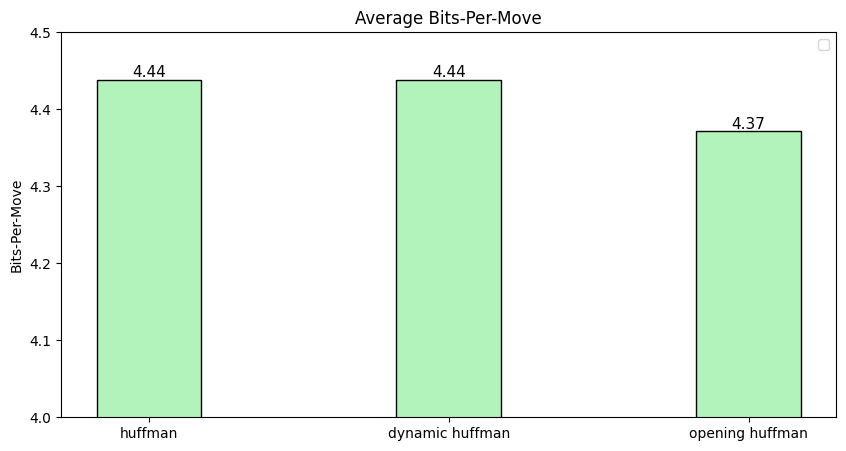

In [10]:
def plot_bpm_bar():
    bpm = {}
    for key in strats:
        if IGNORE_BINCODE and key == "bincode":
            continue

        # calculate the moves within each pgn game
        moves = [
            int(int(metric["compressed size (bits)"]) / float(metric["bits per move"]))
            for metric in strats[key]
        ]

        # get the move-text length
        move_text = [
            int(float(metric["bits per move excluding headers"]) * moves[i])
            for i, metric in enumerate(strats[key])
        ]

        # if the strategy is huffman or dynamic huffman, remove 1 bit from the move-text length
        if key == "huffman" or key == "dynamic huffman":
            move_text = [move - 1 for move in move_text]

        # if the strategy is opening huffman, remove 2 bits from the move-text length
        if key == "opening huffman":
            move_text = [move - 2 for move in move_text]

        # calculate the bits per move
        bpmeh = [move / moves[i] for i, move in enumerate(move_text)]
        bpm[key] = bpmeh

    # print average bits per move
    print("Average Bits Per Move")
    for key in bpm:
        print(f"{key}: {np.mean(bpm[key]):.5f}")

    # plot the compression and decompression times next to each other
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(bpm))
    width = 0.35
    bars = ax.bar(
        x,
        [np.mean(bpm[key]) for key in bpm],
        width,
        label="",
        color="#b2f2bb",
        edgecolor="black",
    )

    ax.set_ylabel("Bits-Per-Move")
    ax.set_title("Average Bits-Per-Move")
    ax.set_xticks(x)
    ax.set_xticklabels(bpm.keys())
    ax.legend()

    # Add labels on top of the bars
    for bars in [bars]:
        for bar in bars:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{bar.get_height():.2f}",
                ha="center",
                va="bottom",
                fontsize=11,
            )

    ax.set_ylim(4, 4.5)
    plt.show()


IGNORE_BINCODE = True
plot_bpm_bar()

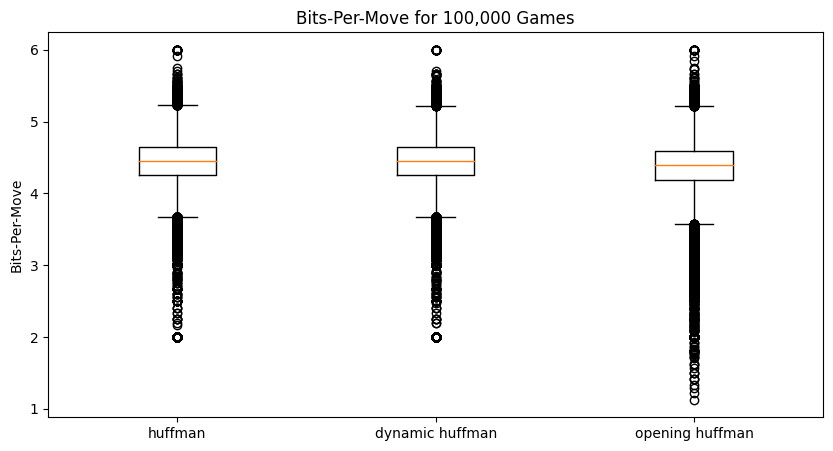

In [11]:
def plot_bpm_box():
    bpm = {}
    for key in strats:
        if IGNORE_BINCODE and key == "bincode":
            continue

        # calculate the moves within each pgn game
        moves = [
            int(int(metric["compressed size (bits)"]) / float(metric["bits per move"]))
            for metric in strats[key]
        ]

        # get the move-text length
        move_text = [
            int(float(metric["bits per move excluding headers"]) * moves[i])
            for i, metric in enumerate(strats[key])
        ]

        # if the strategy is huffman or dynamic huffman, remove 1 bit from the move-text length
        if key == "huffman" or key == "dynamic huffman":
            move_text = [move - 1 for move in move_text]

        # if the strategy is opening huffman, remove 2 bits from the move-text length
        if key == "opening huffman":
            move_text = [move - 2 for move in move_text]

        # calculate the bits per move
        bpmeh = [move / moves[i] for i, move in enumerate(move_text)]
        bpm[key] = bpmeh

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.boxplot([bpm[key] for key in bpm])
    ax.set_xticklabels(bpm.keys())
    plt.title("Bits-Per-Move for 100,000 Games")
    ax.set_ylabel("Bits-Per-Move")
    plt.show()


IGNORE_BINCODE = True
plot_bpm_box()